In [37]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

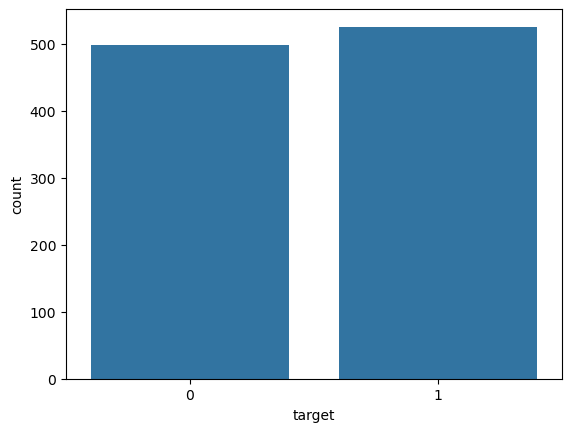

In [21]:
# Lihat informasi umum 
print(data.info()) 
# Hitung statistik deskriptif 
print(data.describe()) 
# Distribusi target (benign vs malignant) 
print(data['target'].value_counts()) 
# Visualisasi distribusi diagnosis (benign=0, malignant=1) 
sns.countplot(x='target', data=data) 
plt.show() 

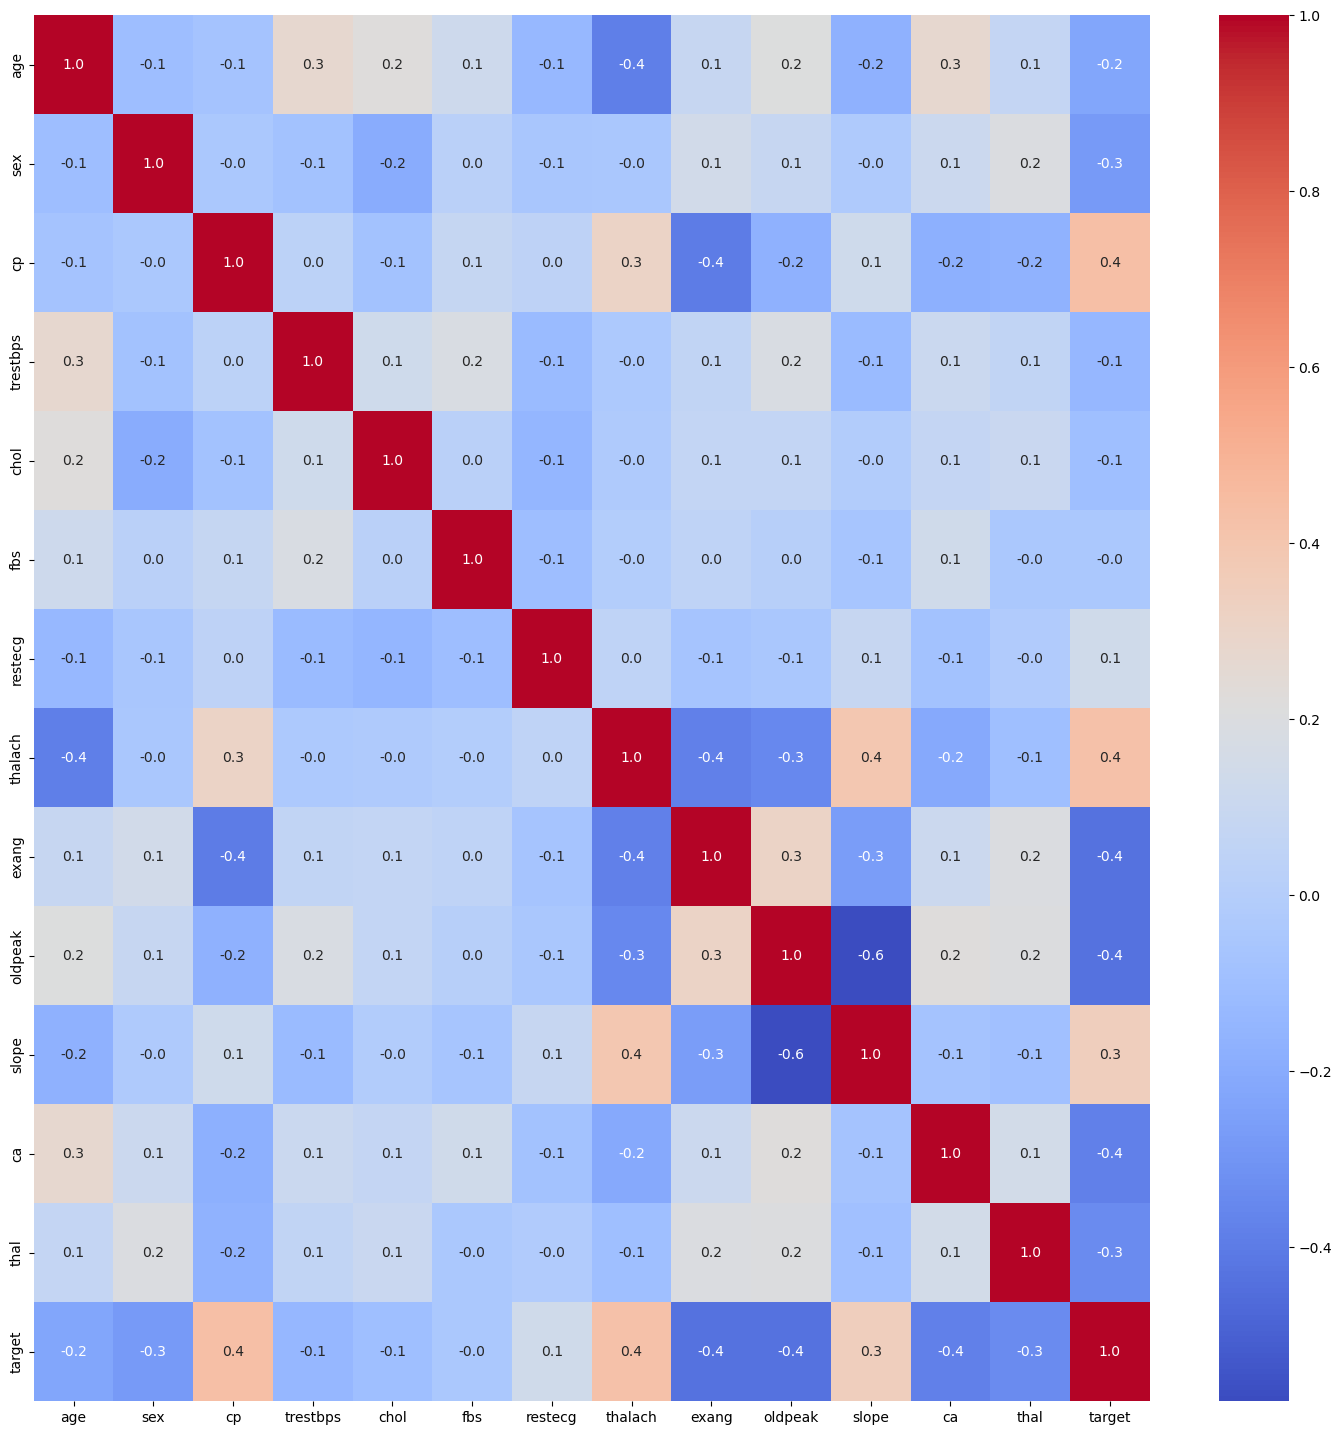

In [23]:
# Korelasi antara fitur 
corr_matrix = data.corr() 
# Visualisasi korelasi dalam bentuk heatmap 
plt.figure(figsize=(18,18)) 
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm') 
plt.show()

In [41]:
# Pisahkan fitur dan target 
X = data.drop('target', axis=1) 
y = data['target'] 

#untuk membuat model klasifikasi, kita bagi data jadi data training dan data testing
#data training digunakan untuk membuat model (x_train, y_train)
#data testing untuk menguji model (x_test, y_test)

# Bagi dataset menjadi data latih dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Standarisasi fitur 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [43]:
X_train, y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 835   49    1   2       118   149    0        0      126      0      0.8   
 137   64    0   0       180   325    0        1      154      1      0.0   
 534   54    0   2       108   267    0        0      167      0      0.0   
 495   59    1   0       135   234    0        1      161      0      0.5   
 244   51    1   2       125   245    1        0      166      0      2.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 700   41    1   2       130   214    0        0      168      0      2.0   
 71    61    1   0       140   207    0        0      138      1      1.9   
 106   51    1   0       140   299    0        1      173      1      1.6   
 270   43    1   0       110   211    0        1      161      0      0.0   
 860   52    1   0       112   230    0        1      160      0      0.0   
 
      slope  ca  thal  
 835      2   3     2  
 137      2   0     2  
 5

In [45]:
# Inisialisasi model Logistic Regression 
#untuk mengelompokkan pendekatannyalebih dekat ke bening atau malignant
model = LogisticRegression() #model baru dibuat
# Latih model 
model.fit(X_train_scaled, y_train) #model sudah belajar based on data training (sudah pintar)
# Prediksi pada data uji yaitu menguji apakah target yang dihasilkan oleh model sama dengan target yang sudah ada di y_test
y_pred = model.predict(X_test_scaled) #proses memprediksi dan menghasilkan y_pred

Accuracy: 0.80


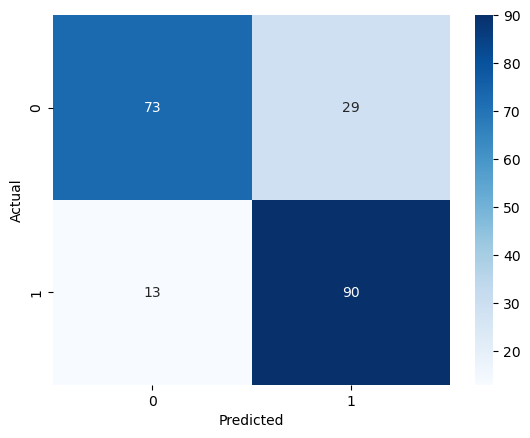

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [47]:
# Evaluasi akurasi 
accuracy = accuracy_score(y_test, y_pred) #membandingkan y_test dan y_pred
print(f'Accuracy: {accuracy:.2f}') 
# Matriks confusion 
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 
# Laporan klasifikasi 
print(classification_report(y_test, y_pred)) 

Random Forest Accuracy:  0.9853658536585366
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



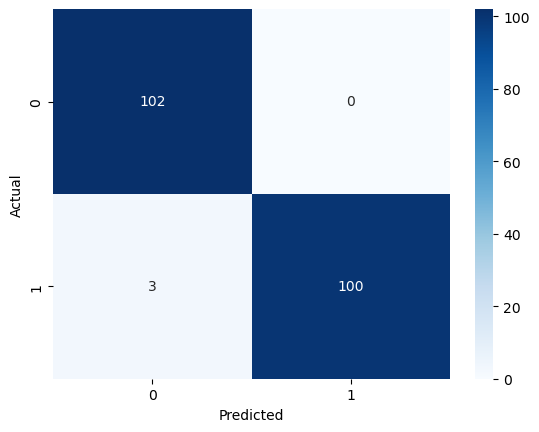

In [49]:
# Import library Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data latih
rf_model.fit(X_train_scaled, y_train)

# Prediksi dengan data uji
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluasi model Random Forest
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# Matriks confusion untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Accuracy:  0.8146341463414634
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



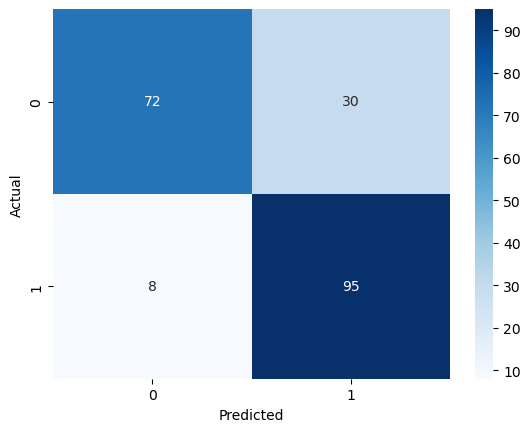

In [51]:
# Import library SVM
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Latih model dengan data latih
svm_model.fit(X_train_scaled, y_train)

# Prediksi dengan data uji
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model SVM
print("SVM Accuracy: ", accuracy_score(y_test, svm_y_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))

# Matriks confusion untuk SVM
conf_matrix_svm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
